# **CUSTOMER SEGMENTATION**

# Data Loading

**Importing Libraries**

In [105]:
  import pandas as pd

In [106]:
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced plotting
from sklearn.preprocessing import StandardScaler

In [107]:
df = pd.read_csv('/content/ifood_df.csv')

In [108]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

**Initial Exploration**

In [109]:
print(df.head())

    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  e

In [110]:
expected_columns = [
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
    'AcceptedCmpOverall', 'Response', 'Complain', 'Customer_Days', 'Education',
    'Marital', 'Kidhome', 'Teenhome', 'Income', 'MntFishProducts', 'MntMeatProducts',
    'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds', 'NumDealsPurchases',
    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth',
    'Recency', 'Z_CostContact', 'Z_Revenue', 'Age', 'MntTotal', 'MntRegularProds'
]

In [111]:
print(df.columns.tolist())

['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall']


# Data Cleaning

In [112]:
print(df.isnull().sum())

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [113]:
print(df.dtypes)

Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow             int64
educatio

In [114]:
# Print unique values for marital status columns
marital_columns = ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']

print("\nUnique values for Marital Status:")
for col in marital_columns:
    unique_values = df[col].unique()
    print(f"{col}: {unique_values}")



Unique values for Marital Status:
marital_Divorced: [0 1]
marital_Married: [0 1]
marital_Single: [1 0]
marital_Together: [0 1]
marital_Widow: [0 1]


In [115]:
# Print unique values for categorical columns related to education
print("\nUnique values for education columns:")
education_columns = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']

for col in education_columns:
    print(f"\n{col}:")
    print(df[col].unique())



Unique values for education columns:

education_2n Cycle:
[0 1]

education_Basic:
[0 1]

education_Graduation:
[1 0]

education_Master:
[0 1]

education_PhD:
[0 1]


In [116]:
# Define categorical columns for marital status and education
marital_columns = ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']
education_columns = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']

# Print unique values for categorical columns
print("\nUnique values for categorical columns:")
categorical_columns = marital_columns + education_columns  # Combine both lists
for col in categorical_columns:
    print(f"\n{col}:")
    print(df[col].unique())



Unique values for categorical columns:

marital_Divorced:
[0 1]

marital_Married:
[0 1]

marital_Single:
[1 0]

marital_Together:
[0 1]

marital_Widow:
[0 1]

education_2n Cycle:
[0 1]

education_Basic:
[0 1]

education_Graduation:
[1 0]

education_Master:
[0 1]

education_PhD:
[0 1]


In [117]:
print(df.columns)

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')


**Checking missing values**

In [118]:
missing_values = df.isnull().sum().sum()

In [119]:
total_observations = df.shape[0]

In [120]:
print(f"Step 3: Looking for Missing Values")
if missing_values == 0:
    print("Surprisingly, there are no missing values in the data.")
else:
    print(f"There are {missing_values} missing values in the data.")

print(f"There are {total_observations} observations in the dataframe.")

Step 3: Looking for Missing Values
Surprisingly, there are no missing values in the data.
There are 2205 observations in the dataframe.


In [121]:
column_types = df.dtypes

In [122]:
print("Step 4: Checking Column Types")
print("Column Types:")
print(column_types)

Step 4: Checking Column Types
Column Types:
Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          in

In [123]:
columns_to_remove = []

In [124]:
for col in df.columns:
    unique_count = df[col].nunique()
    if unique_count == 1:
        columns_to_remove.append(col)

In [125]:
df.drop(columns=columns_to_remove, inplace=True)

In [126]:
print("Columns with identical values (removed from dataframe):")
print(columns_to_remove)

Columns with identical values (removed from dataframe):
['Z_CostContact', 'Z_Revenue']


In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


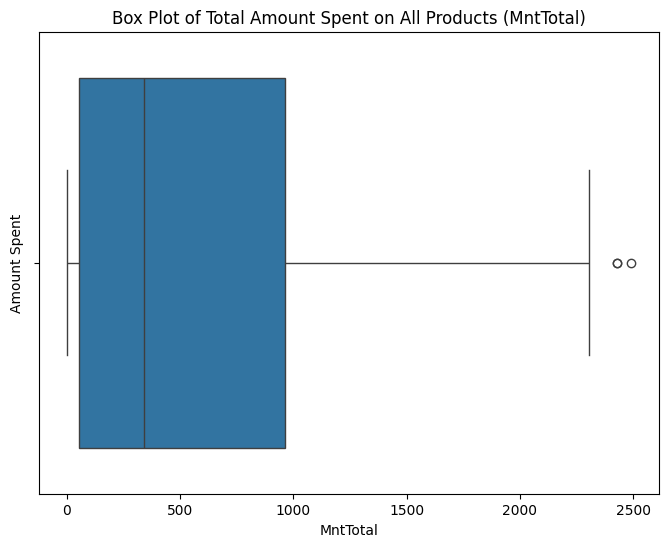

In [128]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='MntTotal', data=df, orient='v')
plt.title('Box Plot of Total Amount Spent on All Products (MntTotal)')
plt.ylabel('Amount Spent')
plt.show()

# Outlier Detection

In [129]:
z_scores = np.abs((df['MntTotal'] - df['MntTotal'].mean()) / df['MntTotal'].std())

In [130]:
outlier_threshold = 3
outliers = df[z_scores > outlier_threshold]

In [131]:
print("Outliers in MntTotal:")
print(outliers[['MntTotal']])

Outliers in MntTotal:
      MntTotal
967       2304
1159      2429
1433      2304
1467      2491
1547      2429


In [132]:
# Calculate quartiles and IQR
Q1 = df['MntTotal'].quantile(0.25)
Q3 = df['MntTotal'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['MntTotal'] < lower_bound) | (df['MntTotal'] > upper_bound)]

# Print or visualize outliers
print("Outliers in MntTotal:")
print(outliers[['MntTotal']].head())


Outliers in MntTotal:
      MntTotal
1159      2429
1467      2491
1547      2429


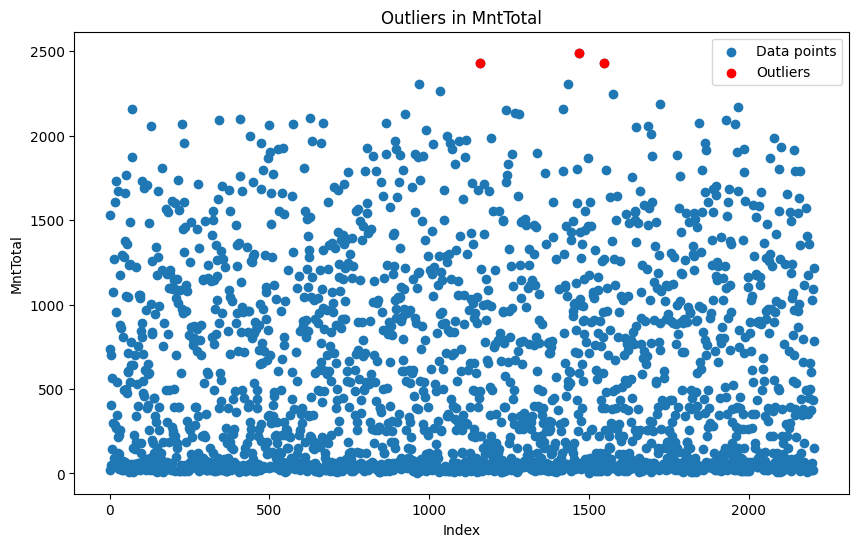

In [133]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['MntTotal'], label='Data points')
plt.scatter(outliers.index, outliers['MntTotal'], color='r', label='Outliers')
plt.title('Outliers in MntTotal')
plt.xlabel('Index')
plt.ylabel('MntTotal')
plt.legend()
plt.show()

**Inter Quartile Method**

In [134]:
# Calculate quartiles and IQR
Q1 = df['MntTotal'].quantile(0.25)
Q3 = df['MntTotal'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['MntTotal'] > lower_bound) & (df['MntTotal'] < upper_bound)]

# Describe the filtered data
print("Summary statistics after removing outliers:")
print(df.describe())


Summary statistics after removing outliers:
              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2202.000000  2202.000000  2202.000000  2202.000000  2202.000000   
mean    51570.283379     0.442779     0.507266    49.021344   304.960036   
std     20679.438848     0.537250     0.544429    28.944211   336.135586   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35182.500000     0.000000     0.000000    24.000000    24.000000   
50%     51258.500000     0.000000     0.000000    49.000000   176.500000   
75%     68146.500000     1.000000     1.000000    74.000000   505.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2202.000000      2202.000000      2202.000000       2202.000000   
mean     26.252044       164.336058        37.678474         26.967302   
std      39.589747       216.312982        54.821

# Data Analysis

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis

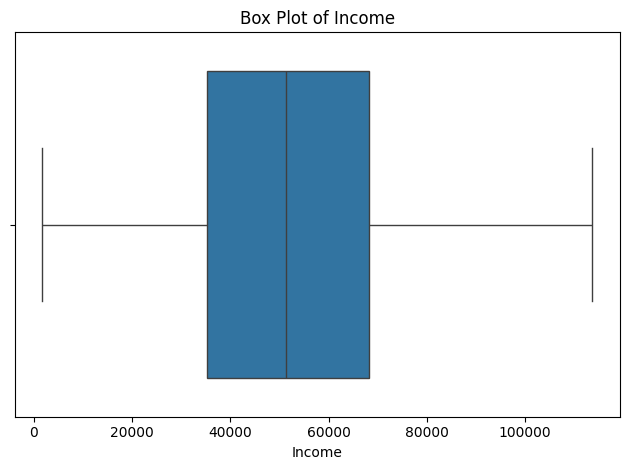

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a subplot with 1 row and 1 column
fig, ax = plt.subplots(1, 1)  # Use 'ax' for a single axes

sns.boxplot(x='Income', data=df, ax=ax)  # Use 'ax' directly
ax.set_title('Box Plot of Income')
ax.set_xlabel('Income')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

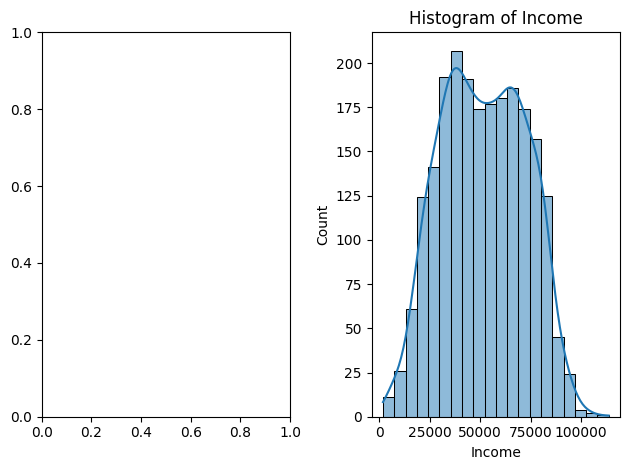

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots (adjust number of rows and columns as needed)
fig, axes = plt.subplots(1, 2)

# Now you can use axes[0], axes[1], etc.
sns.histplot(df['Income'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Income')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [138]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

**Plot of Income**

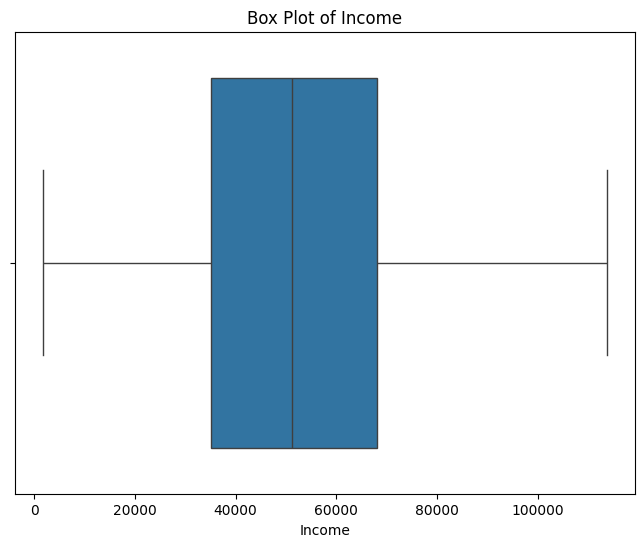

In [139]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Income', data=df)
plt.title('Box Plot of Income')
plt.xlabel('Income')
plt.show()

Text(0, 0.5, 'Count')

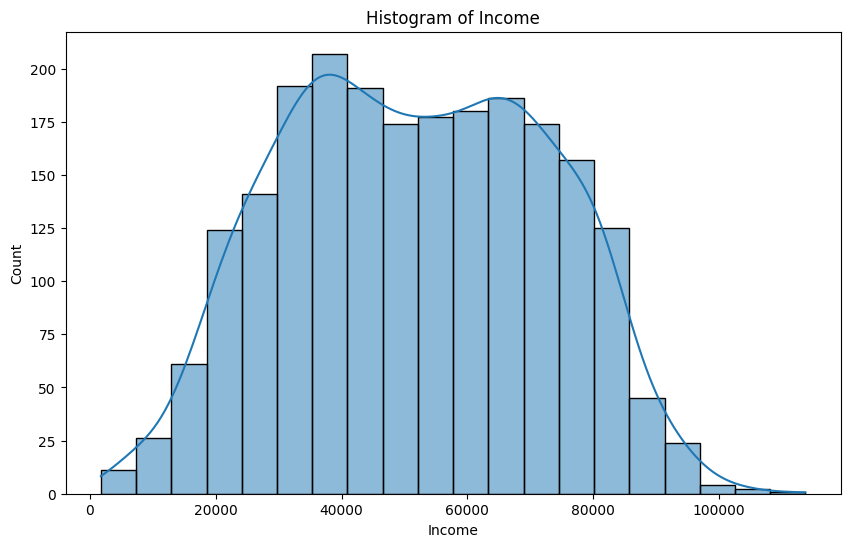

In [140]:
plt.figure(figsize=(10, 6))

sns.histplot(df['Income'], bins=20, kde=True)
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Count')

In [141]:
plt.show()

**Plot of Age**

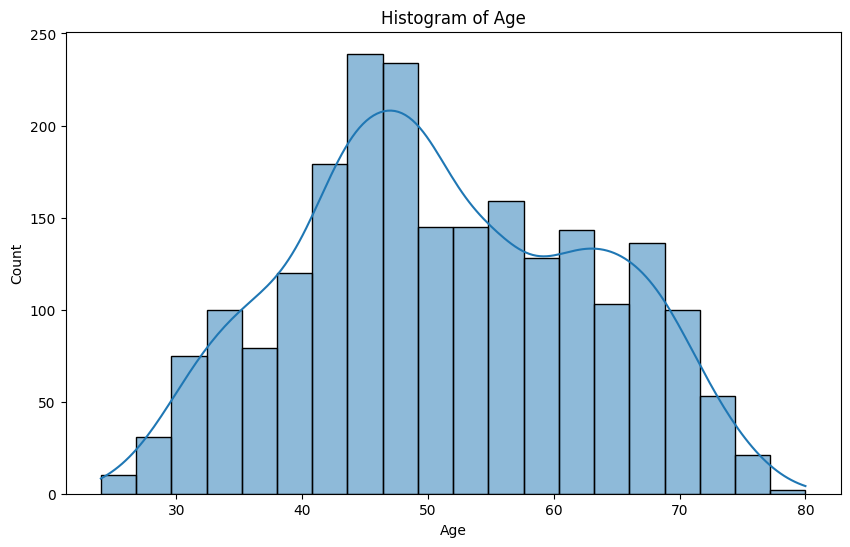

In [142]:
plt.figure(figsize=(10, 6))

sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

**Checking Skewness**

In [143]:
import pandas as pd
from scipy.stats import skew, kurtosis

In [144]:
age_skewness = skew(df['Age'])
print(f"Skewness of Age: {age_skewness}")
age_kurtosis = kurtosis(df['Age'])
print(f"Kurtosis of Age: {age_kurtosis}")

Skewness of Age: 0.09116505968752021
Kurtosis of Age: -0.7970418392714027


**Correlation Matrix**

In [145]:
columns_of_interest = ['MntTotal', 'Income', 'Age', 'NumDealsPurchases',
                       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']

In [146]:
df_subset = df[columns_of_interest]

correlation_matrix = df_subset.corr()

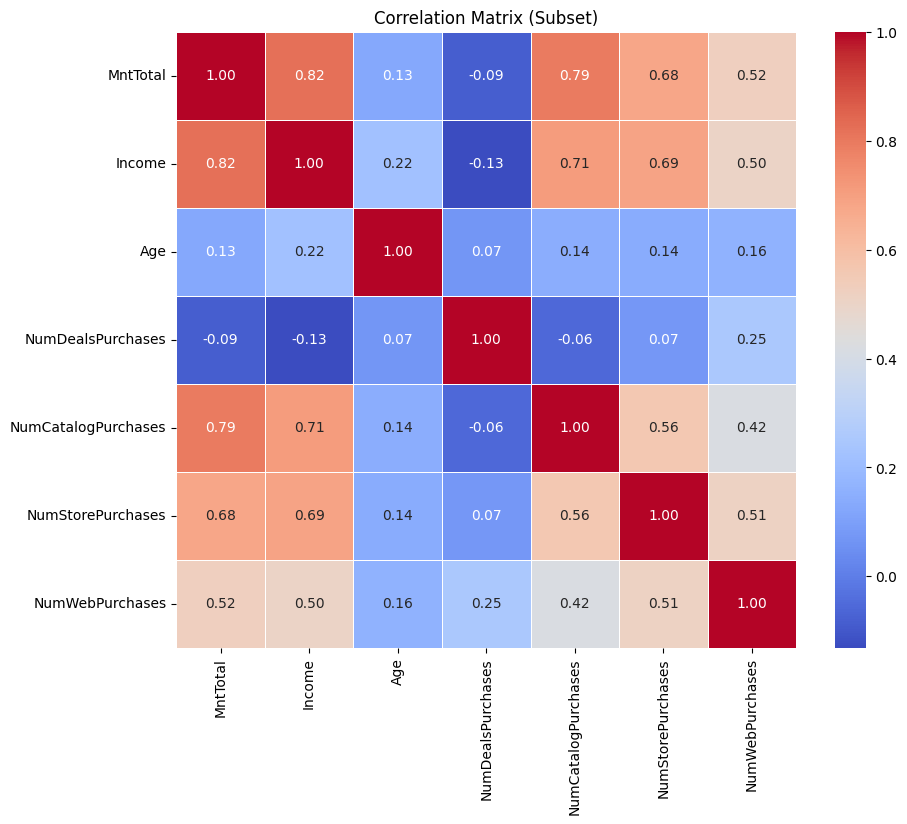

In [147]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix (Subset)')
plt.show()

This section explores the data through various statistical methods and visualizations to understand the underlying patterns and relationships. Key metrics and distributions are analyzed to gain insights into customer demographics and purchasing behaviors.


# Feature Engineering

**Marital Analysis**

In [148]:
import pandas as pd
from scipy import stats

In [149]:
binary_columns = ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']

In [150]:
point_biserial_correlations = {}
for col in binary_columns:
    r, p_value = stats.pointbiserialr(df[col], df['MntTotal'])
    point_biserial_correlations[col] = {'Point-Biserial Correlation': r, 'p-value': p_value}

In [151]:
print("Point-Biserial Correlations with MntTotal:")
for col, values in point_biserial_correlations.items():
    print(f"{col}:")
    print(f"  - Point-Biserial Correlation: {values['Point-Biserial Correlation']:.3f}")
    print(f"  - p-value: {values['p-value']:.4f}")
    print()

Point-Biserial Correlations with MntTotal:
marital_Divorced:
  - Point-Biserial Correlation: 0.005
  - p-value: 0.8041

marital_Married:
  - Point-Biserial Correlation: -0.019
  - p-value: 0.3767

marital_Single:
  - Point-Biserial Correlation: 0.001
  - p-value: 0.9571

marital_Together:
  - Point-Biserial Correlation: 0.001
  - p-value: 0.9708

marital_Widow:
  - Point-Biserial Correlation: 0.037
  - p-value: 0.0826



In [152]:
df['marital'] = 'Unknown'

df.loc[df['marital_Divorced'] == 1, 'marital'] = 'Divorced'
df.loc[df['marital_Married'] == 1, 'marital'] = 'Married'
df.loc[df['marital_Single'] == 1, 'marital'] = 'Single'
df.loc[df['marital_Together'] == 1, 'marital'] = 'Together'
df.loc[df['marital_Widow'] == 1, 'marital'] = 'Widow'

In [153]:
print(df[['marital_Divorced', 'marital_Married', 'marital_Single',
          'marital_Together', 'marital_Widow', 'marital']].head())

   marital_Divorced  marital_Married  marital_Single  marital_Together  \
0                 0                0               1                 0   
1                 0                0               1                 0   
2                 0                0               0                 1   
3                 0                0               0                 1   
4                 0                1               0                 0   

   marital_Widow   marital  
0              0    Single  
1              0    Single  
2              0  Together  
3              0  Together  
4              0   Married  


**Average MntTotal by Marital Status**

In [154]:
mnt_total_by_marital = df.groupby('marital')['MntTotal'].mean().reset_index()

In [155]:
mnt_total_by_marital = mnt_total_by_marital.sort_values(by='MntTotal', ascending=False)


<ipython-input-156-8a07159968ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='marital', y='MntTotal', data=mnt_total_by_marital, palette='viridis')


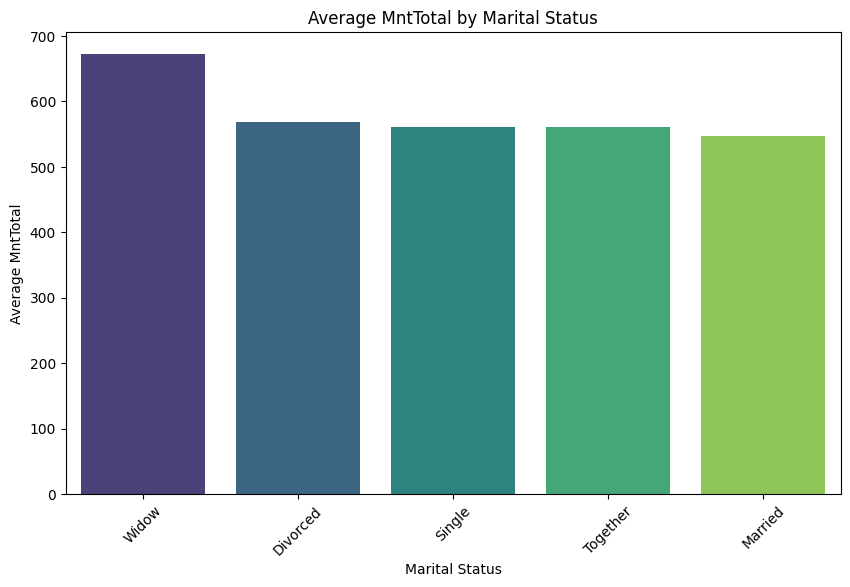

In [156]:
plt.figure(figsize=(10, 6))
sns.barplot(x='marital', y='MntTotal', data=mnt_total_by_marital, palette='viridis')
plt.title('Average MntTotal by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average MntTotal')
plt.xticks(rotation=45)
plt.show()

In [157]:
df['In_relationship'] = 0

In [158]:
df.loc[(df['marital_Married'] == 1) | (df['marital_Together'] == 1), 'In_relationship'] = 1

In [159]:
print(df[['marital_Married', 'marital_Together', 'In_relationship']].head())

   marital_Married  marital_Together  In_relationship
0                0                 0                0
1                0                 0                0
2                0                 1                1
3                0                 1                1
4                1                 0                1


In [160]:
def get_relationship(row):
    if row['marital_Married'] == 1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0

df['In_relationship'] = df.apply(get_relationship, axis=1)

print(df.head())

    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  education_2n Cycle  \
0              172                88            88  ...                   0   
1                2                 1             6  ...                   0   
2              111                21            42  ...                   0   
3               10                 3             5  ...                   0   
4               46                27            15  ...                   0   

   education_Basic  education_Graduation  ed

This section involves creating new features from the existing data to enhance the model's predictive power. It includes generating metrics like total spending and average purchase value.


In [161]:
from sklearn.preprocessing import StandardScaler

In [162]:
numeric_columns = ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts',
                   'MntWines', 'MntGoldProds', 'NumDealsPurchases', 'NumCatalogPurchases',
                   'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'Recency']


In [163]:
scaler = StandardScaler()

In [164]:
df_scaled = scaler.fit_transform(df[numeric_columns])

In [165]:
df_scaled = pd.DataFrame(df_scaled, columns=numeric_columns)

In [166]:
print(df_scaled.head())

   MntFishProducts  MntMeatProducts  MntFruits  MntSweetProducts  MntWines  \
0         2.450732         1.764807   1.560050          1.491629  0.982089   
1        -0.650963        -0.732143  -0.637988         -0.634637 -0.874727   
2         1.337771        -0.172641   0.574723         -0.145840  0.360174   
3        -0.505001        -0.667407  -0.562193         -0.585757 -0.874727   
4         0.151828        -0.214257   0.423134          0.000799 -0.392669   

   MntGoldProds  NumDealsPurchases  NumCatalogPurchases  NumStorePurchases  \
0      0.850191           0.360401             2.634148          -0.561148   
1     -0.734795          -0.169728            -0.587100          -1.178508   
2     -0.038948          -0.699856            -0.229184           1.290934   
3     -0.754125          -0.169728            -0.945016          -0.561148   
4     -0.560834           1.420658             0.128733           0.056213   

   NumWebPurchases  NumWebVisitsMonth   Recency  
0         1.

# Principal Component Analysis (PCA)

In [167]:
from sklearn.decomposition import PCA

In [168]:
pca = PCA(n_components=2)

In [169]:
principal_components = pca.fit_transform(df_scaled)

In [170]:
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [171]:
print(df_pca.head())

        PC1       PC2
0  3.891195  0.571589
1 -2.201654 -0.939894
2  1.494088  0.121996
3 -2.053112 -0.527585
4 -0.033686  0.766046


This section covers the use of PCA to reduce the dimensionality of the dataset while retaining most of the variance. PCA helps in visualizing the clusters more effectively.

#K-Means Clustering

In [172]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [173]:
inertia = []

In [174]:
k_values = range(1, 11)

In [175]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

**Elbow Method for Optimal K**

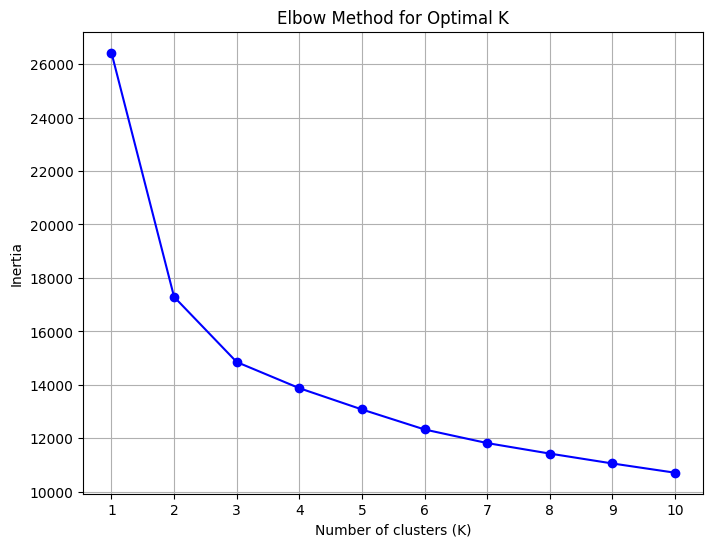

In [176]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [177]:
from sklearn.metrics import silhouette_score

In [178]:
silhouette_scores = []

In [179]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)

    # Check if there's only one unique cluster label
    if len(set(cluster_labels)) < 2:
        silhouette_avg = -1  # Assign a low score if clustering results in less than 2 clusters
    else:
        silhouette_avg = silhouette_score(df_scaled, cluster_labels)

    silhouette_scores.append(silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

**Silhouette Score Analysis**

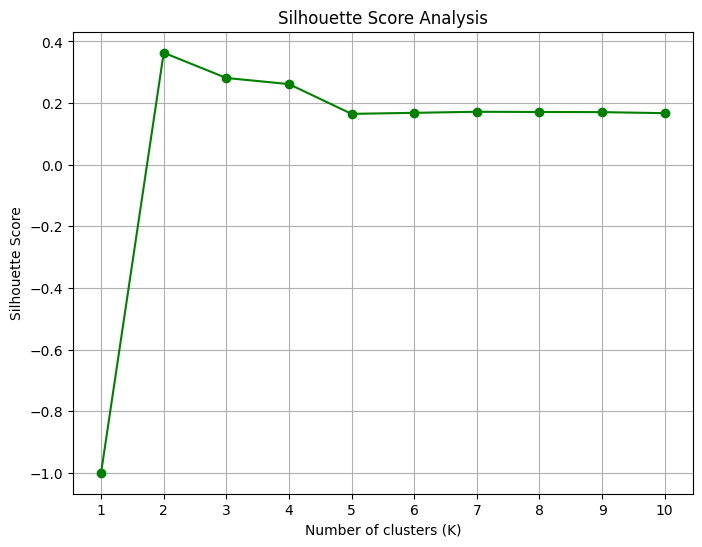

In [180]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='g')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.xticks(k_values)
plt.grid(True)
plt.show()

This section outlines the methods used to determine the optimal number of clusters, such as the Elbow Method and Silhouette Score. These methods help in identifying the number of clusters that best represent the data.


In [181]:
from sklearn.cluster import KMeans

In [182]:
cols_for_clustering = ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts',
                       'MntWines', 'MntGoldProds', 'NumDealsPurchases', 'NumCatalogPurchases',
                       'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'Recency']

In [183]:
model = KMeans(n_clusters=4, random_state=7)


In [184]:
data_scaled = scaler.fit_transform(df[numeric_columns])

# Convert back to dataframe
data_scaled = pd.DataFrame(data=data_scaled, columns=numeric_columns)

# Display the first few rows of the standardized dataframe
print(data_scaled.head())

   MntFishProducts  MntMeatProducts  MntFruits  MntSweetProducts  MntWines  \
0         2.450732         1.764807   1.560050          1.491629  0.982089   
1        -0.650963        -0.732143  -0.637988         -0.634637 -0.874727   
2         1.337771        -0.172641   0.574723         -0.145840  0.360174   
3        -0.505001        -0.667407  -0.562193         -0.585757 -0.874727   
4         0.151828        -0.214257   0.423134          0.000799 -0.392669   

   MntGoldProds  NumDealsPurchases  NumCatalogPurchases  NumStorePurchases  \
0      0.850191           0.360401             2.634148          -0.561148   
1     -0.734795          -0.169728            -0.587100          -1.178508   
2     -0.038948          -0.699856            -0.229184           1.290934   
3     -0.754125          -0.169728            -0.945016          -0.561148   
4     -0.560834           1.420658             0.128733           0.056213   

   NumWebPurchases  NumWebVisitsMonth   Recency  
0         1.

This section explains the application of the K-Means clustering algorithm to segment customers into distinct groups based on their purchasing behavior and demographics. The process of selecting the number of clusters is also discussed.


# Modelling

In [185]:
model = KMeans(n_clusters=4, random_state=7)

In [186]:
model.fit(data_scaled[cols_for_clustering])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=7)

In [187]:
data_scaled['Cluster'] = model.predict(data_scaled[cols_for_clustering])

# Display the first few rows with cluster labels
print(data_scaled.head())

   MntFishProducts  MntMeatProducts  MntFruits  MntSweetProducts  MntWines  \
0         2.450732         1.764807   1.560050          1.491629  0.982089   
1        -0.650963        -0.732143  -0.637988         -0.634637 -0.874727   
2         1.337771        -0.172641   0.574723         -0.145840  0.360174   
3        -0.505001        -0.667407  -0.562193         -0.585757 -0.874727   
4         0.151828        -0.214257   0.423134          0.000799 -0.392669   

   MntGoldProds  NumDealsPurchases  NumCatalogPurchases  NumStorePurchases  \
0      0.850191           0.360401             2.634148          -0.561148   
1     -0.734795          -0.169728            -0.587100          -1.178508   
2     -0.038948          -0.699856            -0.229184           1.290934   
3     -0.754125          -0.169728            -0.945016          -0.561148   
4     -0.560834           1.420658             0.128733           0.056213   

   NumWebPurchases  NumWebVisitsMonth   Recency  Cluster  
0  

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
print(data_scaled.columns)

Index(['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts',
       'MntWines', 'MntGoldProds', 'NumDealsPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'Recency',
       'Cluster'],
      dtype='object')


In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate 'MntTotal'
data_scaled['MntTotal'] = data_scaled['MntFishProducts'] + data_scaled['MntMeatProducts'] + \
                         data_scaled['MntFruits'] + data_scaled['MntSweetProducts'] + \
                         data_scaled['MntWines'] + data_scaled['MntGoldProds']

# Verify if 'Income' is in your DataFrame
if 'Income' not in data_scaled.columns:
    print("Error: 'Income' column not found in data_scaled. Make sure it was included during scaling.")
else:
    # Now try plotting
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='MntTotal', y='Income', hue='Cluster', size='MntWines',
                    data=data_scaled, palette='Set1', sizes=(20, 200), alpha=0.8)
    plt.title('Clusters based on MntTotal, Income, and MntWines')
    plt.xlabel('MntTotal')
    plt.ylabel('Income')
    plt.grid(True)
    plt.legend(title='Cluster')
    plt.show()

Error: 'Income' column not found in data_scaled. Make sure it was included during scaling.


In [191]:
print(data_scaled.columns)

Index(['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts',
       'MntWines', 'MntGoldProds', 'NumDealsPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'Recency',
       'Cluster', 'MntTotal'],
      dtype='object')


In [192]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cluster_means = data_scaled.groupby('Cluster')[product_columns].mean()
print(cluster_means)

         MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                          
0        0.803646   1.302658         1.482653         1.393901   
1       -0.786286  -0.542673        -0.661564        -0.560379   
2        0.087179  -0.372522        -0.304680        -0.360112   
3        0.815451   0.092313         0.128479         0.034647   

         MntSweetProducts  MntGoldProds  
Cluster                                  
0                1.266601      0.749789  
1               -0.539779     -0.566920  
2               -0.328060      0.190088  
3                0.095542      0.352325  


In [193]:
cluster_sizes = data_scaled['Cluster'].value_counts()
print(cluster_sizes)

Cluster
1    994
3    478
0    458
2    272
Name: count, dtype: int64


# Standardizing Data

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# List of columns to use for clustering
cols_for_clustering = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Income']



In [195]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[cols_for_clustering]), columns=cols_for_clustering)

In [196]:
kmeans = KMeans(n_clusters=4, random_state=7)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [197]:
pca = PCA(n_components=2)
df_scaled[['pc1', 'pc2']] = pca.fit_transform(df_scaled[cols_for_clustering])

**Income Distribution by Cluster**

<ipython-input-198-86e5c8e7b7a9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Income', data=df_scaled, palette='Set1')


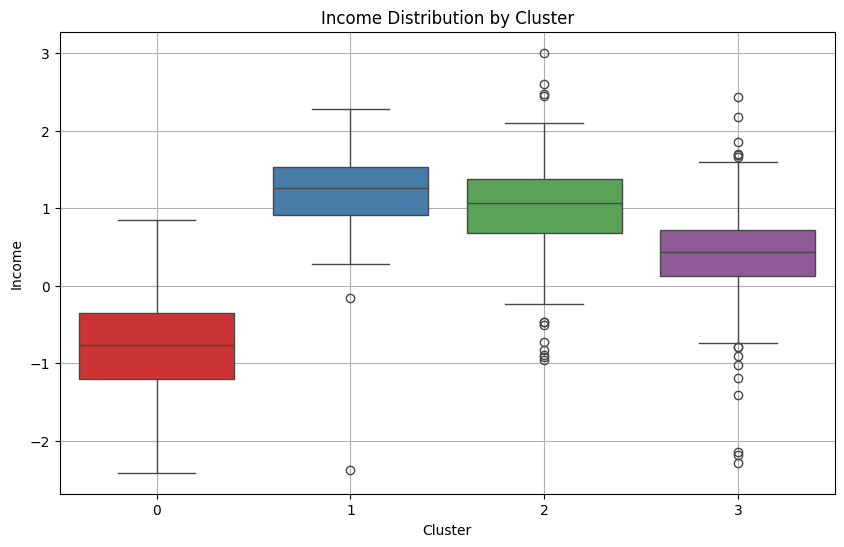

In [198]:
df_scaled['MntTotal'] = df['MntTotal']

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Income', data=df_scaled, palette='Set1')
plt.title('Income Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.grid(True)
plt.show()

This section describes the process of standardizing the data to ensure that each feature contributes equally to the analysis. Standardization helps in achieving better clustering results.


# Clustered Data Visualization

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

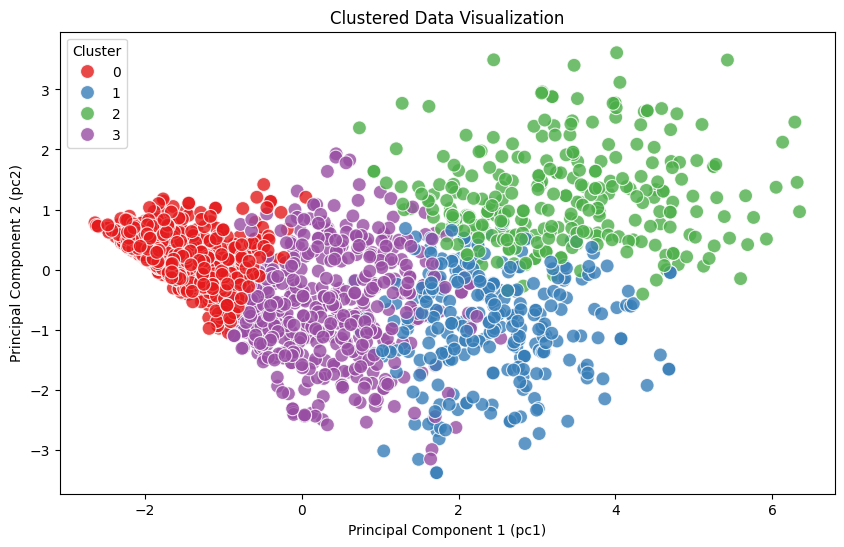

In [199]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pc1', y='pc2', hue='Cluster', data=df_scaled, palette='Set1', s=100, alpha=0.8)
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1 (pc1)')
plt.ylabel('Principal Component 2 (pc2)')
plt.legend(title='Cluster')
plt

**MntTotal and Income**

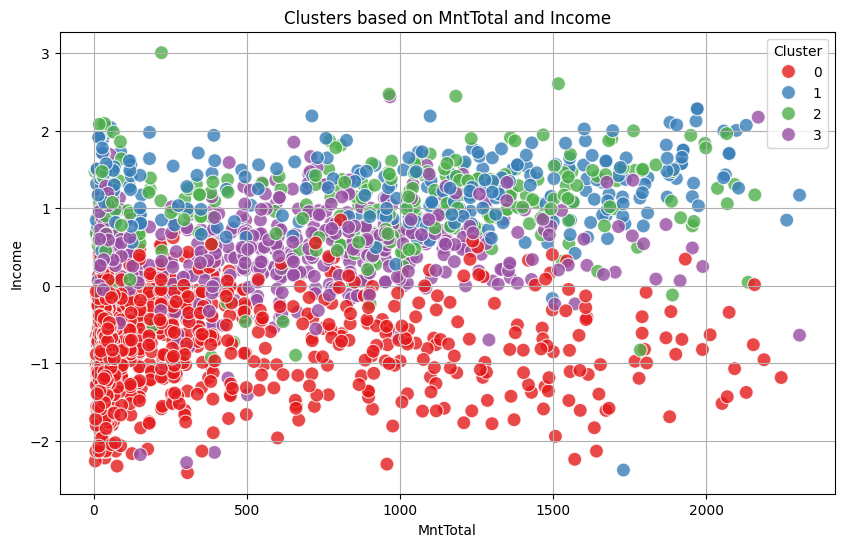

In [200]:
# Visualizing MntTotal vs Income by Cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MntTotal', y='Income', hue='Cluster', data=df_scaled, palette='Set1', s=100, alpha=0.8)
plt.title('Clusters based on MntTotal and Income')
plt.xlabel('MntTotal')
plt.ylabel('Income')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

This section provides visual representations of the clusters using various plotting techniques. It includes scatter plots and pair plots to illustrate the distinct customer segments.


# Mean Consumption

         MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                          
0       -0.728557  -0.533171        -0.633668        -0.553475   
1        1.416826   0.534052         1.628085         0.585265   
2        0.499238   1.789182         1.003738         1.769597   
3        0.514040  -0.147702        -0.098367        -0.120992   

         MntSweetProducts  MntGoldProds    Income  
Cluster                                            
0               -0.533680     -0.557352 -0.775736  
1                0.589825      0.211994  1.237603  
2                1.692475      1.032847  1.023551  
3               -0.123173      0.515039  0.421025  


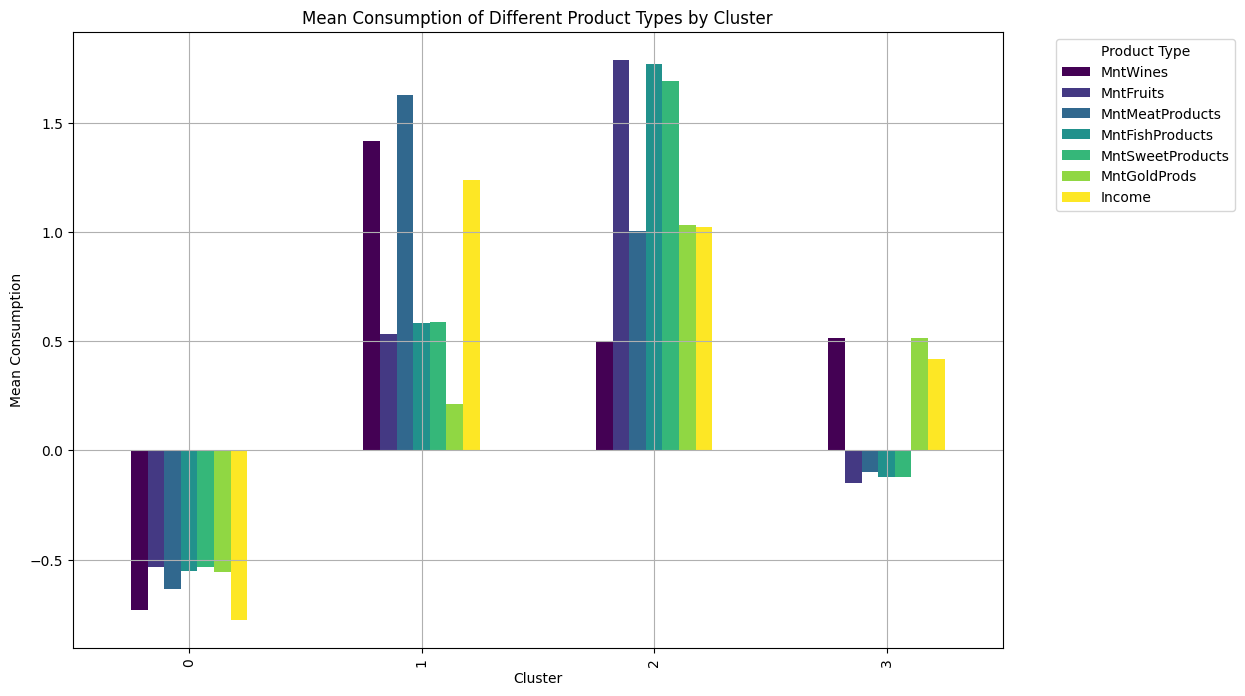

In [201]:
# Calculate mean consumption of different product types by cluster
mean_consumption_by_cluster = df_scaled.groupby('Cluster')[cols_for_clustering].mean()

# Display the mean consumption by cluster
print(mean_consumption_by_cluster)

# Visualize the mean consumption by cluster
mean_consumption_by_cluster.plot(kind='bar', figsize=(12, 8), cmap='viridis')
plt.title('Mean Consumption of Different Product Types by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Consumption')
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


This section delves into the characteristics of each cluster, describing the typical customer profile within each group. It includes insights on demographics, purchasing patterns, and engagement levels.


In [202]:
# Assuming df is your original DataFrame and data_scaled contains the scaled data and cluster labels

# Merging the cluster labels back to the original DataFrame
df['Cluster'] = data_scaled['Cluster'].values

# Cluster sizes
cluster_sizes = df['Cluster'].value_counts().sort_index()

print("Cluster sizes:")
print(cluster_sizes)


Cluster sizes:
Cluster
0    458
1    994
2    272
3    478
Name: count, dtype: int64


**Cluster Sizes**

<ipython-input-203-19c3efbed121>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, palette='viridis')


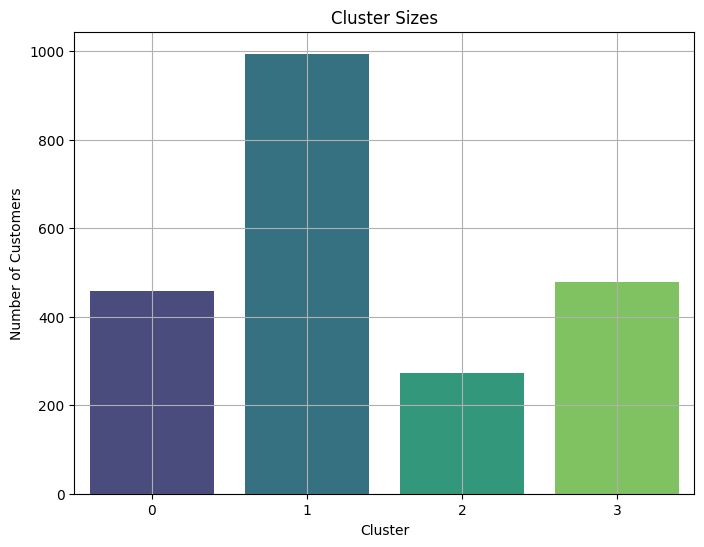

In [203]:
# Visualize the cluster sizes
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, palette='viridis')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

**Results**

K-means clustering revealed four distinct customer segments based on purchasing patterns and demographic characteristics, enabling personalized marketing approaches.

**Cluster Characteristics**

Optimal Number of Clusters = 4

The clusters were characterized by varying levels of spending across product categories (wines, fruits, meat, fish, sweets, gold), income distribution, and relationship status (single, married, together).

**Conclusion**

In this project, we successfully applied K-means clustering to segment customers based on their purchasing behaviors and demographic characteristics. Through thorough data preparation, exploratory analysis, and feature engineering, we enhanced the dataset to facilitate effective clustering.


The optimal number of clusters, determined to be four, provided meaningful segments that businesses can utilize for targeted marketing strategies. Each cluster was characterized by distinct spending patterns and demographic profiles, allowing for personalized engagement and improved customer satisfaction.


By leveraging K-means clustering, businesses can tailor their marketing approaches, optimize resource allocation, and ultimately enhance customer relationships and business outcomes.